<a href="https://colab.research.google.com/github/abdyraman/quantium/blob/main/quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
behaviors_df=pd.read_csv('QVI_purchase_behaviour.csv')
transactions_df=pd.read_excel('QVI_transaction_data.xlsx')


In [10]:
behaviors_df.isnull().sum()
behaviors_df.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [11]:
transactions_df.isnull().sum()
transactions_df.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [12]:
behaviors_df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
32278,119261,OLDER SINGLES/COUPLES,Budget
61436,231347,RETIREES,Budget
63605,238302,OLDER SINGLES/COUPLES,Premium
27216,99199,YOUNG SINGLES/COUPLES,Budget
53082,199367,OLDER FAMILIES,Mainstream
62617,235314,YOUNG FAMILIES,Budget
64040,240096,YOUNG FAMILIES,Budget
3599,13051,OLDER SINGLES/COUPLES,Premium
10726,39100,NEW FAMILIES,Premium
8746,32151,RETIREES,Mainstream


In [14]:
for col in behaviors_df.columns:
        print(col, behaviors_df[col].unique())

LYLTY_CARD_NBR [   1000    1002    1003 ... 2370751 2370961 2373711]
LIFESTAGE ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER ['Premium' 'Mainstream' 'Budget']


In [13]:
transactions_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
158016,43343,91,91362,90497,88,Kettle Honey Soy Chicken 175g,2,10.8
31537,43575,189,189131,189967,114,Kettle Sensations Siracha Lime 150g,1,4.6
213393,43635,191,191199,192938,103,RRD Steak & Chimuchurri 150g,2,5.4
235295,43391,199,199364,199183,52,Grain Waves Sour Cream&Chives 210G,2,7.2
116393,43323,254,254433,254485,3,Kettle Sensations Camembert & Fig 150g,1,4.6
88141,43301,104,104207,104983,81,Pringles Original Crisps 134g,2,7.4
187022,43525,27,27159,24184,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2
41870,43630,105,105192,106454,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2
140779,43568,90,90338,89063,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2
8711,43340,79,79147,77406,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [15]:
for col in transactions_df.columns:
        print(col, transactions_df[col].unique())

DATE [43390 43599 43605 43329 43330 43604 43601 43332 43602 43603 43600 43326
 43328 43331 43327 43633 43348 43370 43523 43543 43632 43429 43414 43533
 43405 43537 43561 43311 43391 43409 43528 43535 43576 43468 43366 43624
 43313 43448 43587 43474 43566 43529 43369 43554 43519 43451 43564 43563
 43382 43407 43489 43510 43627 43284 43299 43309 43552 43593 43611 43526
 43578 43584 43357 43494 43547 43550 43318 43467 43555 43294 43386 43496
 43504 43520 43583 43321 43446 43568 43643 43646 43287 43562 43423 43434
 43479 43333 43508 43634 43436 43458 43463 43579 43620 43622 43345 43361
 43482 43617 43625 43288 43352 43360 43404 43290 43323 43363 43399 43402
 43551 43556 43365 43367 43439 43518 43539 43639 43292 43395 43450 43462
 43503 43336 43375 43381 43534 43644 43295 43509 43325 43400 43443 43502
 43607 43302 43387 43412 43536 43424 43499 43515 43608 43308 43428 43484
 43316 43470 43572 43355 43481 43571 43344 43590 43475 43507 43641 43531
 43430 43389 43438 43306 43408 43419 43615 433

Visualisation

In [18]:
unique_counts_objects_behaviors = behaviors_df.select_dtypes('object').nunique()
unique_counts_objects_behaviors

LIFESTAGE           7
PREMIUM_CUSTOMER    3
dtype: int64

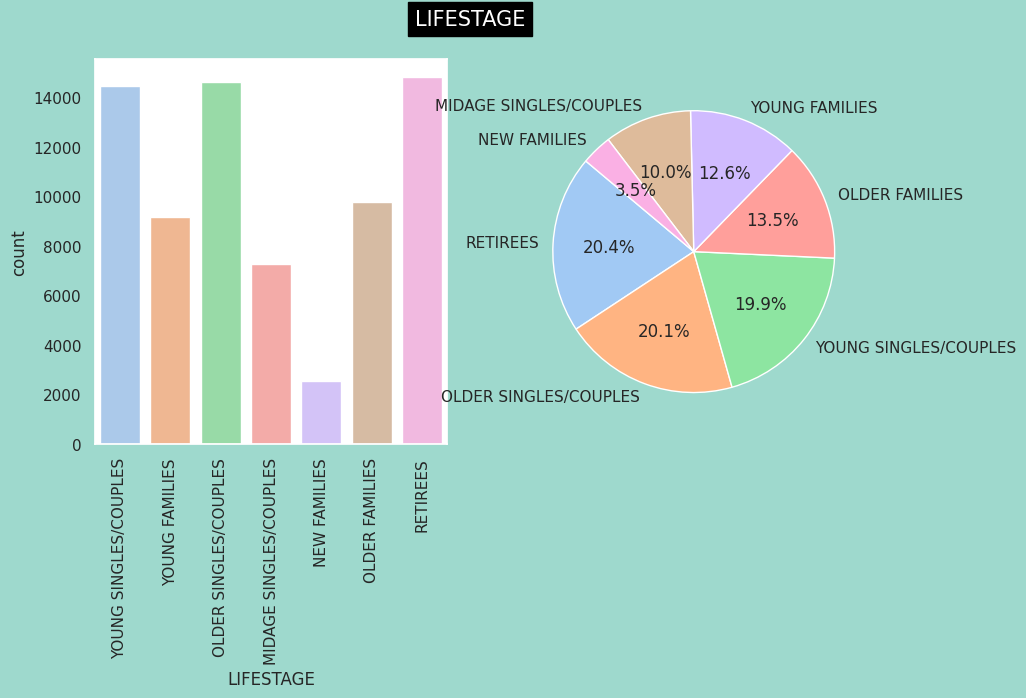

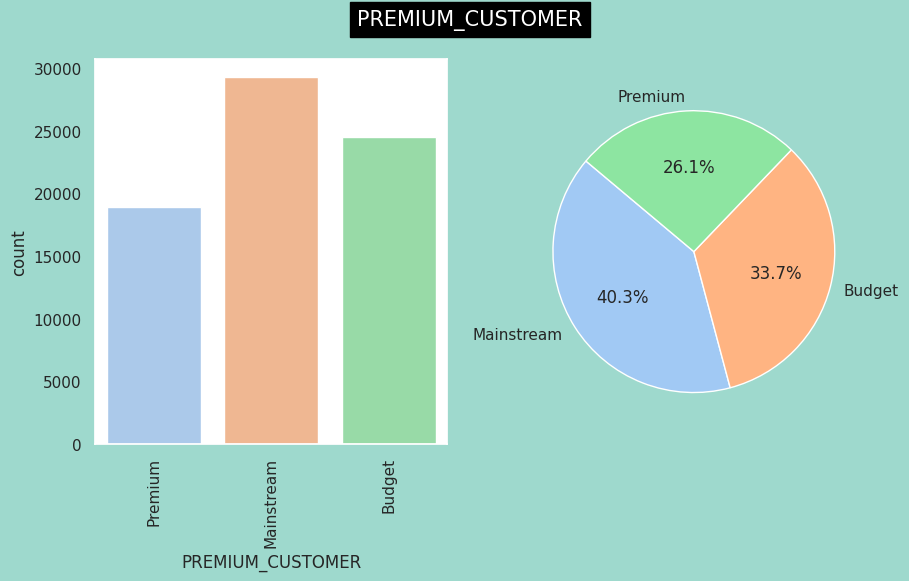

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "#9ed9cd"})
sns.set_palette("pastel")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects_behaviors.index:

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Countplot
    ax1 = sns.countplot(data=behaviors_df, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Pie chart
    count_values = behaviors_df[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()
